# The Singular Value Decomposition (SVD)


Before we start with the implementation of some applications of the singular value decomposition (SVD), we will briefly introduce the theory behind it.  
The SVD is widely used in Data Science and Big Data. The applications are for example  

* least-squares regression
* model or dimensionality reduction
* image compression
* principal component analysis
* ...
---
## Some basics
Given a matrix $A \in \mathbb{R}^{m\times n}$, we want to compute orthogonal matrices $U \in \mathbb{R}^{m\times m}$ and $V \in \mathbb{R}^{n\times n}$ such that <br>    
$$ U^T AV = \Sigma \in \mathbb{R}^{m\times n}$$  
where $\Sigma$ is a diagonal matrix in a sense that 
$$
     \Sigma =\left\{\begin{array}{ll} \begin{pmatrix} \hat{\Sigma} \\ 0 \end{pmatrix}, & m \geq n \\
         \left( \hat{\Sigma} \, 0 \right), & m \leq n \end{array}\right. .
$$<br>
The matrix $\hat{\Sigma} \in \mathbb{R}^{p\times p}$ is a square and diagonal matrix with $p = \min{m,n}$. The diagonal entries are given by $\sigma_1,...,\sigma_p$ with <br>  
$$ \sigma_1 \geq \sigma_2 \geq ... \geq \sigma_r > \sigma_{r+1} = ... = \sigma_p = 0$$  
We call $\sigma_1,...,\sigma_r$ the singular values of the matrix $A$.<br> 
There is a link between the singular values of some matrix $A\in\mathbb{R}^{m\times n}$ and the eigenvalues of the matrix $A^T A \in \mathbb{R}^{m\times m}$ and $A A^T\in\mathbb{R}^{n\times n}$:<br>    
$$ \sigma_j = \sqrt{\lambda_j(A^TA)} = \sqrt{\lambda_j(AA^T)}, \, j = 1,...,r. $$ <br> 
This can be used to compute the singular values of the matrix $A$. We just have to determine the eigenvalues of the matrix $AA^T$ and take the square root of each eigenvalue. Another way to compute the singular values of the matrix $A$ is to use the SVD-algorithm described by Golub, Kahan and Reinsch in 1965. 
## Why use SVD?
We assume that we calculated the SVD of some matrix A with $rank(A) = r$. We can express the matrix as<br>  
$$ A = \sum_{j = 1}^{r} \sigma_j u_j v_j^T $$<br>  
where $u_j \, j =1,...,m$ are the columns of the matrix $U$ and $v_j \, j=1,...,n$ are the columns of the matrix $V$.
We can define a matrix $A_k$ as<br>  
$$ A_k =  \sum_{j = 1}^{k} \sigma_j u_j v_j^T $$ <br>  
with a $k \leq r$. We call the matrix $A_k$ the rank k-approximation of the matrix $A$ since $rank(A_k)=k$. <br>   
One property of the matrix $A_k$ is that it is the best rank k-approximation of the matrix $A$. This means that for any matrix $B \in \mathbb{R}^{m\times n}$ with $rank(B) \leq k$, we have<br>  
$$ ||A - A_k||_2 \leq ||A - B||_2$$. <br>  

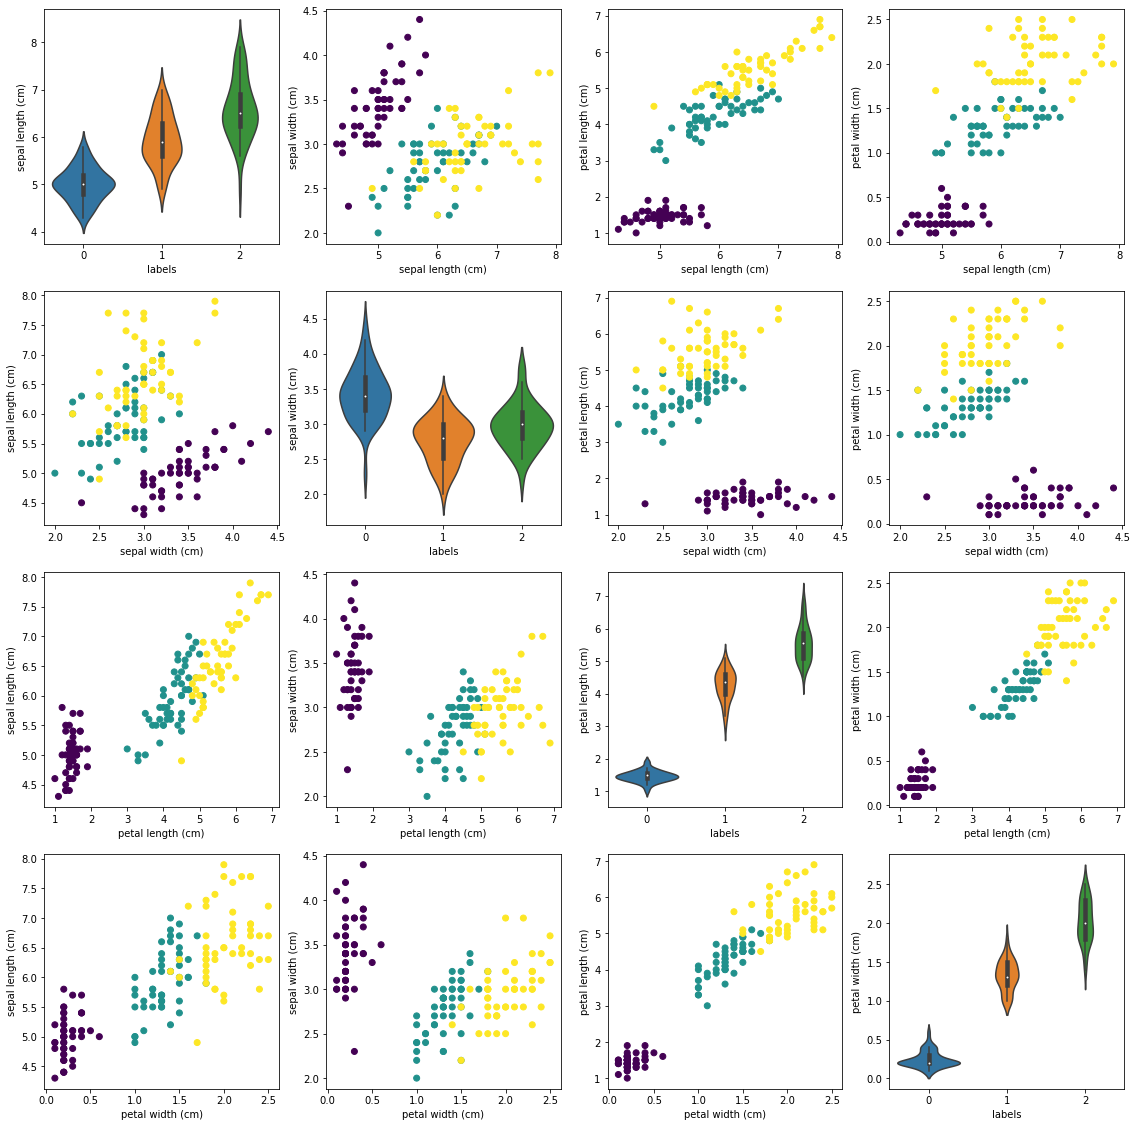

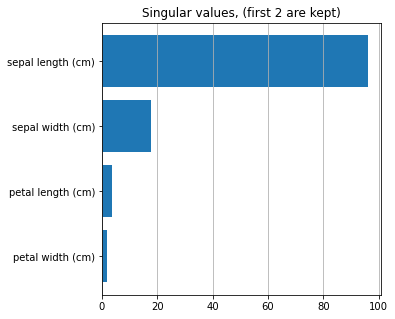

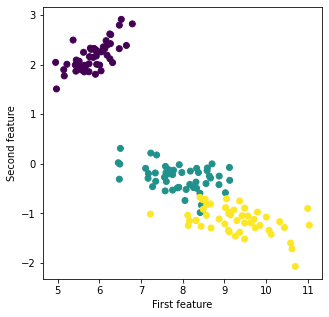

In [2]:
# -*- coding: utf-8 -*-
"""
Preparation DataLab:
    Code from https://www.kaggle.com/lorenzodenisi/svd-decomposition-and-applications
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg



def svd(A, tol=1e-5):
    #singular values and right singular vectors coming from eigenvalues and eigenvectors of A' x A
    eigs, V = linalg.eig(A.T.dot(A))

    #singular values are the square root of the eigenvalues
    sing_vals = np.sqrt(eigs)

    #sort both sigular values and right singular vector
    idx = np.argsort(sing_vals)

    sing_vals = sing_vals[idx[::-1]]
    V = V[:, idx[::-1]]

    #remove zero singular values below tol
    sing_vals_trunc = sing_vals[sing_vals>tol]
    V = V[:, sing_vals>tol]

    #is not necessary to store the entire sigma matrix, so only the diagonal is returned
    sigma = sing_vals_trunc

    #evaluate U matrix
    U = A @ V /sing_vals_trunc
    
    return U.real, sigma.real, V.T.real

def truncate(U, S, V, k):
    U_trunc = U[:, :k]
    S_trunc = S[:k]
    V_trunc = V[:k, :]
    return U_trunc, S_trunc, V_trunc

from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd

iris = load_iris()
iris.keys()

data = pd.DataFrame(iris.data)
feature_names = iris["feature_names"]
data.columns = feature_names
data["labels"] = iris.target

def custom_pairplot(data, feature_names, labels):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(left = 0, right=1.5, bottom=0, top=1.5)
    n_features = len(feature_names)
    
    for i in range(len(feature_names)):
        for j in range(len(feature_names)):
            plt.subplot(n_features, n_features, i*n_features+j+1)
            if i==j:
                sns.violinplot(data=data, x=labels, y=feature_names[i])
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], c=data[labels])
                plt.xlabel(feature_names[i])
                plt.ylabel(feature_names[j])
                
custom_pairplot(data, feature_names=feature_names, labels="labels")                

k = 2

A = data[feature_names].values

U, S, Vt = svd(A)
U_trunc, S_trunc, Vt_trunc = truncate(U, S, Vt, k)

trunc_A = U_trunc @ np.diag(S_trunc)
reduced_data = pd.DataFrame(trunc_A)
plt.figure(figsize=(5, 5))
plt.barh(feature_names[::-1], S[::-1])
plt.title(f"Singular values, (first {k} are kept)")
plt.gca().xaxis.grid(True)

plt.figure(figsize=(5, 5))
plt.scatter(reduced_data[0], reduced_data[1], c = iris.target)
plt.xlabel("First feature")
plt.ylabel("Second feature");